# Real-World Project 2

Begin this project in Week 5 and turn it in for feedback in Discussions by Sunday (11:59 PM) in Week 6. Respond to two of your colleagues by Thursday (11:59 PM) of Week 7 and finally turn in your project on Sunday (11:59 PM) of week 7.

If you are working in Google Colab, you will need to upload your data files, using the file icon on the left. If you are working in Jupyter Lab, be sure your data files are in the folder that you are using.

Note that in this Jupyter notebook, I have included some figures. If you click on the figure, it will look like a *very* long list of characters. Just go back out of editing mode to see the picture.




In [92]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])



# Linear Regression
-------------------------------------------------------------------------
This is adapted from section 8.4 of our text, *Essential Math*

In project 1, you formed the "best fit" line using the least squares method with gradient descent to find the least cost.

In this project, you will learn a different method to find the "best fit" linear formula to approximate the data.

In this hands-on project, you’ll learn how to go from data to a
matrix equation, which will allow you to use linear algebra on your data
and approximate a solution for linear regression problems.

# Part I

# Linear Regression Using the Normal Equation

The normal equation is an equation used to find an analytical solution
for linear regression, as an alternative to gradient descent, which you did in your last project.

Let’s say that you have two-dimensional data on which you want to fit a
line. The goal is to find the parameters of this best-fitting line.
Let’s call the slope $\theta_0$ (pronounced “theta zero”), and the
$y$-intercept $\theta_1$ (pronounced “theta one”).

In this first part, you’ll take only a few data points to easily
understand how you can convert a data problem into a linear algebra
equation.

Take the following three two-dimensional data points:

-   A: (0, 0)
-   B: (1, 2)
-   C: (2, 1)

Let’s plot these data points. You have a $x$ vector with the values 0, 1
and 2, and a $y$-vector with the values 0, 2 and 0.

This gives us the two vectors as $${\bf x} = [x_1, x_2, x_3] \mbox{ and } {\bf y} = [y_1, y_2, y_3 ]$$
where the data points are $$(x_1, y_1)=(0,0), (x_2, y_2)=(1,2), (x_3, y_3)=(2,1)$$

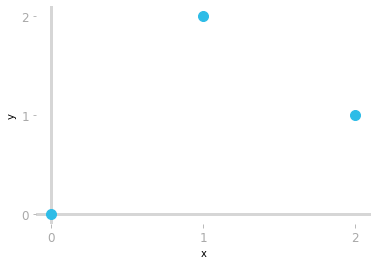

In [93]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])

plt.scatter(x, y)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Figure 1: Scatter plot of the example data points.

The goal is to find the line passing by these data points. The equation
of this line is:

$$
y=\theta_0 x + \theta_1
$$

The first step is to understand how this problem is related to systems
of linear equations.

Start with an hypothetical perfect solution: let’s say that there is a
line passing by all the data points (even if it is not possible). In
this case, the first data sample is on the line, meaning that the $x$
and $y$ values of this data point (which are 0 and 0) satisfy the
equation of your line ${\bf y}=\theta_0 {\bf x} + \theta_1 {\bf b}$.

Replacing these values in the equation, you have:

$$
\begin{aligned}
0 &= \theta_0 \cdot 0 + \theta_1
\end{aligned}
$$

If you proceed identically with the second point, you have:

$$
2 = \theta_0 \cdot 1 + \theta_1
$$

and for the third point:

$$
1 = \theta_0 \cdot 2 + \theta_1
$$

With these equations, you have a system of
equations. You can see that the unknowns $\theta_0$ and $\theta_1$ are
the parameters of the line. You can write the system as follows:

$$
\begin{cases}
0 &= 0 \cdot \theta_0 + \theta_1 \\\\
2 &= 1 \cdot \theta_0 + \theta_1 \\\\
1 &= 2 \cdot \theta_0 + \theta_1
\end{cases}
$$

Or under the matrix form:

$$
\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
= \begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$

Note that you need to add a column of 1's to represent the $y$-intercept.  That is because the coefficients of $\theta_1$ are all equal to 1.

# Question 1

Explain why there is no solution to the above system of linear equations.

# Answer question 1 here.

The coefficient matrix has three rows and two columns. Since there are more rows than columns, it is an overdetermined system, the coefficient matrix is not invertible (non-square), and there is no unique solution for 𝜃₀ and 𝜃₁. Instead, we can find the best-fit line (least squares solution) that minimizes the error between the line and the data points.



# Question 2

***Remember that***, since there is no line passing by all the data
points, this system has no solution. You’ll need to find ***an
approximation*** $\hat{\bf x}$.

Let’s use the notation $A {\bf x} = {\bf b}$ with $A$ being the matrix of coefficients,
${\bf x}$ the unknowns ($\theta_0$ and $\theta_1$) and $\bf b$ the solution:

We have

$$
A=\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
$$

$$
{\bf x}=\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
$$

and

$$
{\bf b}=\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$


You can now use the normal equation (from section 8.3.4 in the text) to approximate a solution $\hat {\bf x}$. As you
saw, we have

$$  A^{\text{T}}  A ~ \hat{ \bf x} = A^{\text{T}} ~ {\bf b} $$



and thus:

$$
\hat{\bf x} = (A^{\text{T}}A)^{-1}A^{\text{T}} {\bf b}
$$


# Q2

Explain why the matrix $A^{\text{T}} A $ is invertible, in this particular example. And, in this example, what are the dimensions of $(A^{\text{T}}A)^{-1} A^{\text{T}}$? Explain your answer.


# Answer for question 2.

The metrix 𝐴T𝐴 is invertible due to its non determinant being nonzero The dimensions of (ATA)⁻¹AT are 2x3 this is because the inverse of ATA is 2x2 and when multiplied by AT (dimentions 2x3) you get 2x3

# Question 3

We know that
$(A^{\text{T}}A)^{-1}$ exists.

The expression $(A^{\text{T}}A)^{-1}A^{\text{T}}$ is called the *Moore-Penrose inverse*, or *pseudoinverse*
of the matrix $A$. The pseudoinverse is a generalization of the
inverse. It is denoted as $A^+$.

Notice that if a matrix $B$ is invertible then $(B^{\text{T}}B)^{-1} B^{\text{T}} = B^{-1} (B^{\text T})^{-1}B^{\text T} = B^{-1} $ and that is why it is called a *pseudoinverse*.


Let’s calculate $\hat{\bf x}$:

$$
\hat{\bf x} = (A^{\text{T}}A)^{-1}A^{\text{T}}{\bf b}
$$

For the matrix $A$ and vector $b$ given in questions 1 and 2 above.


# Q3.a

Use the above formula to calculate the value of $\hat {\bf x}$ and print out its value. Use its value to conclude what the slope and y-intercept of the best fit line is.


In [94]:
# Answer question Q3.a here. Find x_hat
# A
A = np.array([
    [0,1],
    [1,1],
    [2,1]
])

# b

b = np.array([
    [0],
    [2],
    [1]
])


# x_hat
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
print(x_hat)


[[0.5]
 [0.5]]


# Q3.b
What is the slope and y-intercept?

#Answer Q3.b here.


The best line has a slope of 0.5 and an intercept of 0.5. 

# Question 4

Plot this regression line using the normal equation along with the data points. Use the code from the previous plot and plot the line on top of it.

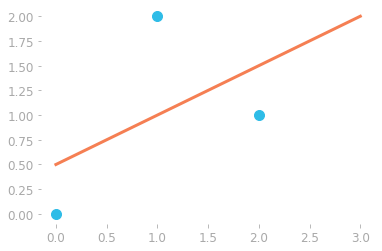

In [95]:
# Answer Question 4 here.
#Regression line using the normal equation

x = np.array([0, 1, 2])
y = np.array([0, 2, 1])
x1 = np.linspace(0, 3, 10)
y1 = 0.5 * x1 + 0.5
plt.scatter(x, y)
plt.plot(x1, y1, c="#F57F53")




Hopefully, the line above looks
good and you just implemented a linear regression using the normal
equation.

This shows an example of how linear algebra concepts as independence,
linear combinations, matrix product, column space, inverse of a matrix
etc., can be used to deeply understand a very common method: linear
regression using the normal equation.

# Part II:

# Food Data

Now, that you saw how to go from data to matrix equations, let’s use
least squares approximation with real data: the CIQUAL dataset on food
composition (french Agency for Food, Environmental and Occupational
Health & Safety. ANSES-CIQUAL French food composition table version
2017. Check out this website to better understand the dataset: https://ciqual.anses.fr/) .

You’ll use the normal equation to model the relationship between the
amount of phosphorus and zinc in vegetables and legumes.

Let’s start by loading the data. You'll need to download the file $\tt ciqual$.csv to your computer. You'll find it in the data folder that came with the text. Then upload it to Google Colab each time you work on the Jupyter notebook, or put it in the proper folder in your documents on your computer if you are using this notebook in Jupyter Lab.

Also, we'll look at the first few entries in the dataset.

In [96]:
# Load the data
data = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

#The following code shows the first 7 lines of the dataset along with the headings.
# It helps you see what you are dealing with.
data.head(7)


,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_eng,alim_ssgrp_nom_eng,alim_ssssgrp_nom_eng,alim_code,alim_nom_eng,alim_nom_eng.1,Energy. Regulation EU No 1169/2011 (kcal/100g),Energy. N x Jones' factor. with fibres (kJ/100g),Energy. N x Jones' factor. with fibres (kcal/100g),Water (g/100g),Protein (g/100g),Protein. crude. N x 6.25 (g/100g),Carbohydrate (g/100g),Fat (g/100g),Sugars (g/100g),Starch (g/100g),Fibres (g/100g),Polyols (g/100g),Ash (g/100g),Alcohol (g/100g),Organic acids (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),FA 4:0 (g/100g),FA 6:0 (g/100g),FA 8:0 (g/100g),FA 10:0 (g/100g),FA 12:0 (g/100g),FA 14:0 (g/100g),FA 16:0 (g/100g),FA 18:0 (g/100g),FA 18:1 n-9 cis (g/100g),FA 18:2 9c.12c (n-6) (g/100g),FA 18:3 c9.c12.c15 (n-3) (g/100g),FA 20:4 5c.8c.11c.14c (n-6) (g/100g),FA 20:5 5c.8c.11c.14c.17c (n-3) EPA (g/100g),FA 22:6 4c.7c.10c.13c.16c.19c (n-3) DHA (g/100g),Cholesterol (mg/100g),Salt (g/100g),Calcium (mg/100g),Chloride (mg/100g),Copper (mg/100g),Iron (mg/100g),Iodine (µg/100g),Magnesium (mg/100g),Manganese (mg/100g),Phosphorus (mg/100g),Potassium (mg/100g),Selenium (µg/100g),Sodium (mg/100g),Zinc (mg/100g),Retinol (µg/100g),Beta-carotene (µg/100g),Vitamin D (µg/100g),Vitamin E (mg/100g),Vitamin K1 (µg/100g),Vitamin K2 (µg/100g),Vitamin C (mg/100g),Vitamin B1 or Thiamin (mg/100g),Vitamin B2 or Riboflavin (mg/100g),Vitamin B3 or Niacin (mg/100g),Vitamin B5 or Pantothenic acid (mg/100g),Vitamin B6 (mg/100g),Vitamin B9 or Folate (µg/100g),Vitamin B12 (µg/100g)
0,1,101,0,starters and dishes,mixed salads,NaN,25600,Celeriac in remoulade sauce. prepacked,Celeriac in remoulade sauce. prepacked,NaN,NaN,NaN,78.5,1.12,1.12,4.19,12.8,2.38,1.3,2.87,0,1.59,0,NaN,1.08,7.73,3.67,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.013,0.66,0.22,4.64,1.69,1.03,NaN,NaN,< 0.01,0.1,1,28.6,616,0.069,0.29,2,12,0.11,35,315,< 10,395,0.22,< 2,< 8,< 0.5,3.4,NaN,NaN,25.2,< 0.04,< 0.04,0.38,0.28,0.19,28,< 0.08
1,1,101,0,starters and dishes,mixed salads,NaN,25601,Prepared mixed tuna and vegetable salad. canne...,Prepared mixed tuna and vegetable salad. canne...,NaN,NaN,NaN,76.5,9.15,9.15,7.74,4.7,3.08,4.1,2.7,0,1.79,0,NaN,0.56,1.83,1.76,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.008,0.38,0.12,NaN,1.15,0.056,NaN,0.008,0.039,19.2,1.11,20.7,731,0.1,1.1,2,25.1,0.1,88.4,232,NaN,445,0.6,< 2,NaN,< 0.5,1.6,NaN,NaN,2.75,< 0.04,0.053,4.45,< 0.16,0.29,31,1.45
2,1,101,0,starters and dishes,mixed salads,NaN,25602,Prepared mixed meat/fish canned. drained salad,Prepared mixed meat/fish canned. drained salad,NaN,NaN,NaN,76.7,8.06,8.06,6.4,5.3,1.9,3.3,2,0,1.5,0,NaN,0.16,3.27,1.54,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,0.12,0.04,2.24,1.08,0.28,0.016,0.016,0.15,15.2,0.95,22,584,0.07,0.7,< 20,20,0.1,92,220,30,381,0.38,< 21,781,0.44,2.04,9.75,NaN,NaN,0.032,0.022,4.13,0.2,0.12,11.1,1.23
3,1,101,0,starters and dishes,mixed salads,NaN,25605,Greek-style marinated mushrooms,Greek-style marinated mushrooms,NaN,NaN,NaN,84.6,2.08,2.08,3.95,3.55,2.38,0.28,2.35,0,1.64,0,NaN,0.23,1.74,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,0.11,1.26,22.6,NaN,0.17,0.58,1.91,13.8,0.13,52.2,292,1.79,500,0.39,0,747,0,1.47,NaN,NaN,10.3,0.062,0.2,1.88,0.76,0.11,27.3,0.018
4,1,101,0,starters and dishes,mixed salads,NaN,25606,Prepared potatoes salad. home-made,Prepared potatoes salad. home-made,NaN,NaN,NaN,76,2.68,2.68,9.9,8.2,NaN,NaN,1.3,0,1.95,0,NaN,1.43,2.48,3.74,NaN,NaN,NaN,0,0.011,0.013,1.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,68,1.33,19,NaN,0.12,0.65,NaN,15,0.1,52,254,NaN,529,0.31,29,36,0,NaN,NaN,NaN,10,0.077,0.06,0.89,0.53,0.14,7,0
5,1,101,0,starters and dishes,mixed salads,NaN,25608,Tabbouleh. prepacked,Tabbouleh. prepacked,NaN,NaN,NaN,66.4,4.29,4.29,22.2,5.65,3.82,13,2.27,0,1.23,0,NaN,0.6,3.3,1.27,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.005,0.38,0.11,NaN,1.03,0.23,< 0.0026,< 0.0026,< 0.0026,0.1,0.91,19.9,NaN,0.12,0.72,2,27.1,0.3,66.5,207,< 10,355,0.46,0,NaN,0,1.68,NaN,NaN,14.5,0.09,0.04,0.83,NaN,0.09,17,0
6,1,101,0,starters and dishes,mixed salads,NaN,25609,Po

Let's look at the data more closely. This gives the count of entries, number of columns, number of non-null entries in each column and their data type.

In [97]:
# Some initial exploration of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   alim_grp_code                                       2807 non-null   int64  
 1   alim_ssgrp_code                                     2807 non-null   int64  
 2   alim_ssssgrp_code                                   2807 non-null   int64  
 3   alim_grp_nom_eng                                    2796 non-null   object 
 4   alim_ssgrp_nom_eng                                  2796 non-null   object 
 5   alim_ssssgrp_nom_eng                                1764 non-null   object 
 6   alim_code                                           2807 non-null   int64  
 7   alim_nom_eng                                        2806 non-null   object 
 8   alim_nom_eng.1                                      2806 non-null   object 
 9

Let’s remove non-numeric characters in the data and convert the columns
to numeric type.

In [98]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Now, you’ll select only part of the dataset you’ll need for the linear
regression. Then, remove the missing values:

In [99]:
food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Phosphorus (mg/100g)", "Zinc (mg/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Phosphorus (mg/100g),Zinc (mg/100g)
308,vegetables. raw,44.4,0.460
309,vegetables. raw,10.0,0.070
310,vegetables. raw,32.7,0.220
311,vegetables. raw,85.6,0.650
312,vegetables. raw,37.5,0.610
...,...,...,...
659,fresh fruits,19.0,0.130
660,fresh fruits,17.0,0.080
661,fresh fruits,9.8,0.050
662,fresh fruits,15.8,0.086


# ******
Now, let’s visualize a scatter plot of the amount of zinc as a function
of the amount of phosphorus (Figure
[156](#fig:ch09_output_zinc_phosphorus)):

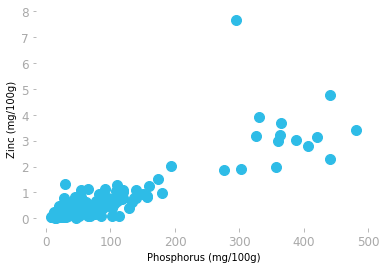

In [100]:
plt.scatter(data["Phosphorus (mg/100g)"], data["Zinc (mg/100g)"])
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()


Figure 3: Amount of zinc as a function of the amount of phosphorus.

You can then create the matrix and vectors corresponding to the equation
$ A {\bf x} = {\bf b}$ (the function `to_numpy()` allows you to convert Pandas
Series to Numpy arrays):

In [101]:
x = data["Phosphorus (mg/100g)"].to_numpy()
b = data["Zinc (mg/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[44.4,  1. ],
       [10. ,  1. ],
       [32.7,  1. ],
       ...,
       [ 9.8,  1. ],
       [15.8,  1. ],
       [32.6,  1. ]])

Now, use the normal equation to calculate $\hat{x}$:

In [102]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([ 0.0084948 , -0.05865873])

You can check that it works by plotting the regression line:

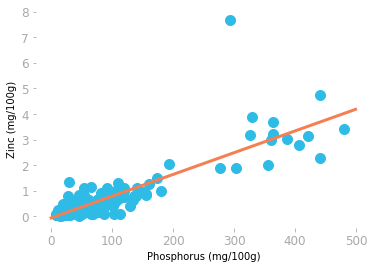

In [103]:
# Regression line representing the relationship between amount of zinc and phosphorus.
x_axis = np.arange(0, 500)
y_line = x_hat[0] * x_axis + x_hat[1]

plt.scatter(data["Phosphorus (mg/100g)"].to_numpy(), data["Zinc (mg/100g)"].to_numpy())
plt.plot(y_line, c="#F57F53")
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()




You can see in Figure above
that the line fits the data well.

# Question 5

Give the forumla for the regression line here.

Now that you have the regression line, explain what is the meaning of it relative to the elements: alim_ssssgrp_nom_eng	Phosphorus (mg/100g)	Zinc (mg/100g). How can you use this regression line? What information does it provide? Compute the correlation and compare and contrast it with what you see in the above scatterplot with the regression line passing through it.

# Answer Question 5 here.

The relationship between the elements is that an increase in phosphorus also results in an increase in zinc. Regression line represents the best fit line used to obtain the linear relationship between two variables thus can be used to draw the relationship between amount of zinc and phosphorus. The correlation between the two elements have been computed below and is 0.8619 which is close to 1 it is a strong positive correlation which is indicative of the graph above, the increasing regression line means its a positive relationship. The dots on the plot is also indicative of this relationship.

In [104]:
corr = np.corrcoef(data["Phosphorus (mg/100g)"], 
                   data["Zinc (mg/100g)"])[0,1]
corr

0.8619538009745913

# Question 6

Multiple linear regression. This time, choose 3 new elements of the dataset ciqual.csv. Two independent variables an one dependent variable. The idea is to use the two independent variables to predict the value of the dependent variable.

The regression model is a plane. Find the formula for the regression plane.


Complete all of the above steps to find and plot the linear regression model (which will be a plane) of the data, graph the scatterplot in three dimentions with the plane  and finally, draw a conclusion about your result.

You might want to [watch this video first](https://youtu.be/xVgqM35YSDY).

In [105]:
# Load the data
data_1 = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

#The following code shows the first 7 lines of the dataset along with the headings.
# It helps you see what you are dealing with.
data_1.head(7)

data_1 = data_1.replace("< ", "", regex=True).replace('traces', 0)
cols = data_1.loc[:, data_1.columns != 'alim_ssssgrp_nom_eng'].columns
data_1[cols] = data_1[cols].apply(pd.to_numeric, errors='coerce')

food_1 = ['vegetables. raw','crackers', 'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried', 'dairy desserts',
       'fresh fruits', 'pasta. rice and grains. cooked','dairy desserts']

data_1 = data_1[['alim_ssssgrp_nom_eng', 'Iron (mg/100g)', 'Vitamin C (mg/100g)', 'Sugars (g/100g)']]
data_1 = data_1[(data_1['alim_ssssgrp_nom_eng'].isin(food_1))]

data_1 = data_1.dropna()

data_1

,alim_ssssgrp_nom_eng,Iron (mg/100g),Vitamin C (mg/100g),Sugars (g/100g)
308,vegetables. raw,0.34,4.07,1.00
309,vegetables. raw,0.85,3.08,0.50
310,vegetables. raw,0.31,5.84,5.42
311,vegetables. raw,0.69,3.40,1.43
312,vegetables. raw,0.85,18.50,0.70
...,...,...,...,...
1981,dairy desserts,1.00,0.50,13.50
1982,dairy desserts,0.30,0.50,12.40
1984,dairy desserts,1.37,0.24,15.80
1989,dairy desserts,1.08,1.10,16.10


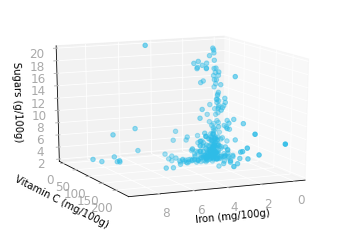

In [106]:
x_1 = data_1["Iron (mg/100g)"].to_numpy()
y_2 = data_1["Vitamin C (mg/100g)"].to_numpy()
z = data_1["Sugars (g/100g)"].to_numpy()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, y_2, z)


plt.xlabel("Iron (mg/100g)")
plt.ylabel("Vitamin C (mg/100g)")
ax.set_zlabel("Sugars (g/100g)")

# zoom in on Protein axis to remove outliers
ax.set_zlim(2, 20)
#adjusting 3D 
ax.view_init(elev=15, azim=66)

In [107]:
x_1 = data_1['Iron (mg/100g)'].to_numpy()
y_2 = data_1['Vitamin C (mg/100g)'].to_numpy()
b = data_1['Sugars (g/100g)'].to_numpy()


A_1 = np.vstack([x_1, y_2, np.ones(x_1.shape[0])]).T
print(A_1.shape)
A_1

(299, 3)


array([[0.34, 4.07, 1.  ],
       [0.85, 3.08, 1.  ],
       [0.31, 5.84, 1.  ],
       ...,
       [1.37, 0.24, 1.  ],
       [1.08, 1.1 , 1.  ],
       [1.35, 2.  , 1.  ]])

In [108]:
x_hat_1 = np.linalg.inv(A_1.T @ A_1) @ A_1.T @ b
x_hat_1

array([0.19666168, 0.00548748, 4.19545941])

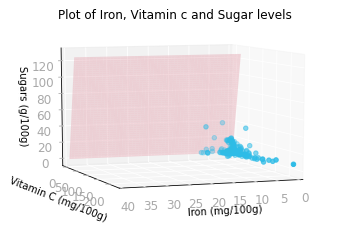

In [111]:
# Regression line representing the relationship between amount of Iron and Vitamin C.
# Regression plane representing the relationship between amount of zinc and phosphorus.
x_1_axis = np.linspace(0, 40, 100)
y_1_axis = np.linspace(0, 30, 100)
x_1_axis, y_1_axis = np.meshgrid(x_1_axis, y_1_axis)
z_plane = x_hat_1[0] + x_hat_1[1] * x_1_axis + x_hat_1[2] * y_1_axis

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.scatter(data_1['Iron (mg/100g)'],
           data_1['Vitamin C (mg/100g)'],
           data_1['Sugars (g/100g)'])
ax.plot_surface(x_1_axis, y_1_axis, z_plane, color='pink', alpha=0.5, label='Regression Plane')

# [...] Add labels
plt.xlabel("Iron (mg/100g)")
plt.ylabel("Vitamin C (mg/100g)")
ax.set_zlabel("Sugars (g/100g)")    
ax.set_title('Plot of Iron, Vitamin c and Sugar levels')

# zoom in on Protein axis to remove outliers
ax.set_xlim(0, 40)

ax.view_init(elev=8, azim=70)

plt.show()

In [113]:
xycorr = np.corrcoef(data_1['Iron (mg/100g)'],
                     data_1['Vitamin C (mg/100g)'])
yzcorr = np.corrcoef(data_1['Vitamin C (mg/100g)'],
                     data_1['Sugars (g/100g)'])

print(f'The correlation coefficient between Iron and Vitamin C is: {xycorr[0, 1]}')
print(f'The correlation coefficient between Sugar and Vitamin C is: {yzcorr[0, 1]}')

The correlation coefficient between Iron and Vitamin C is: -0.058864749700100985
The correlation coefficient between Sugar and Vitamin C is: 0.027681330135729654


The relationship between Iron and Vitamin c according to the calculated correlation coefficient is a negative correlation of -0.058864 and The relationship between Iron and Vitamin c according to the calculated correlation coefficient is a positive correlation of 0.02768. I was expecting a stronger negative correlation because the data for the relationship between Iron and Vitamin C because of the amount of processed and modified food. If a broader variety of food were picked and more categories maybe the correlation would be stronger.

Regression represents the best fit plane used to obtain the relationship between two variables. The regression plane accurately despicts what is shown in the plot between the elements as also described by the correlation coefficient.